In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# EDA
df = pd.read_csv('adult.csv',names=['age','workclass','fnlwgt','education','educationnum','marital-status:','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,educationnum,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df = df.drop(['fnlwgt','education'],axis=1)

In [5]:
df

,age,workclass,educationnum,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   educationnum     32561 non-null  int64 
 3   marital-status:  32561 non-null  object
 4   occupation       32561 non-null  object
 5   relationship     32561 non-null  object
 6   race             32561 non-null  object
 7   sex              32561 non-null  object
 8   capital-gain     32561 non-null  int64 
 9   capital-loss     32561 non-null  int64 
 10  hours-per-week   32561 non-null  int64 
 11  native-country   32561 non-null  object
 12  income           32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [7]:
# 1Feature Engineering
df[df ==' ?'] = np.NaN

In [8]:
df.isnull().sum()

age                   0
workclass          1836
educationnum          0
marital-status:       0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [9]:
# Preprocessing
# Here we perform lableencoder (str value convert into int through labeling)
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['workclass'] = le.fit_transform(df['workclass'])
df['educationnum'] = le.fit_transform(df['educationnum'])
df['marital-status:'] = le.fit_transform(df['marital-status:'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,educationnum,marital-status:,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,12,4,0,1,4,1,2174,0,40,38,0
1,33,5,12,2,3,0,4,1,0,0,13,38,0
2,21,3,8,0,5,1,4,1,0,0,40,38,0
3,36,3,6,2,5,0,2,1,0,0,40,38,0
4,11,3,12,2,9,5,2,0,0,0,40,4,0


In [10]:
for i in {'workclass','occupation','native-country'}:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

age                0
workclass          0
educationnum       0
marital-status:    0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:xlabel='income', ylabel='age'>

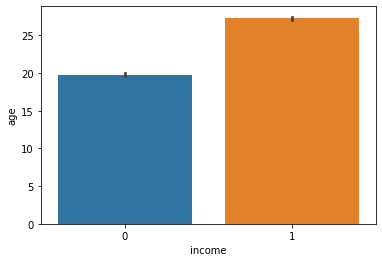

In [12]:
sns.barplot(x = 'income', y = 'age', data = df)

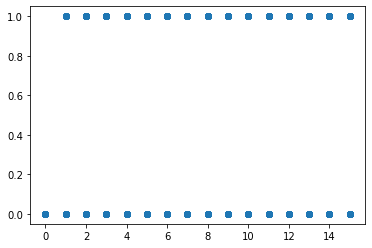

In [13]:
plt.scatter(x='educationnum',y='income',data=df)


<AxesSubplot:>

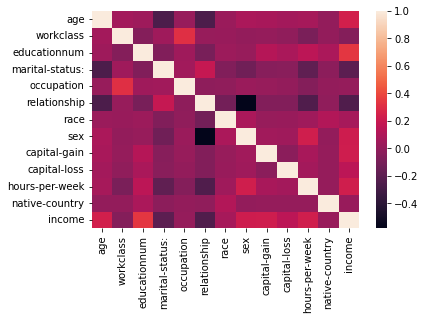

In [14]:
sns.heatmap(df.corr())

## Model Creation

In [15]:
x = df.drop(['income'], axis = 1)
y = df['income']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

In [17]:
model = LogisticRegression(C= 3, max_iter= 300, penalty= 'l2')
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3, max_iter=300)

In [18]:
model.score(x_train,y_train)

0.8120777027027027

In [19]:
# hyperparameter tuning
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [20]:
classifier_regressor=GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=5)


In [24]:
#classifier_regressor.fit(x_train,y_train)


In [22]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 300, 'penalty': 'l2'}


In [23]:
print(classifier_regressor.best_score_)

0.8125768592599034


In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [27]:
print('precision_score =',precision_score(y_test,y_pred))
print('*'*30)
print('recall_score =',recall_score(y_test,y_pred))
print('*'*30)
print('f1_score =',f1_score(y_test,y_pred))
print('*'*30)
print('accuracy_score =',accuracy_score(y_test,y_pred))
print('*'*30)
print('confusion_matrix =',confusion_matrix(y_test,y_pred))
print('*'*30)

precision_score = 0.6744186046511628
******************************
recall_score = 0.40482233502538073
******************************
f1_score = 0.5059476605868359
******************************
accuracy_score = 0.8086903116843237
******************************
confusion_matrix = [[4629  308]
 [ 938  638]]
******************************


In [28]:
y_score1 = model.predict_proba(x_test)[:,1]

In [29]:
y_score1

array([0.0261206 , 0.11984116, 0.92263092, ..., 0.8709641 , 0.23536355,
       0.38704251])

In [30]:
fpr, tpr, threshold1 = roc_curve(y_test, y_score1)

In [31]:
print('roc_auc_score: ', roc_auc_score(y_test, y_score1))

roc_auc_score:  0.8268635955167085


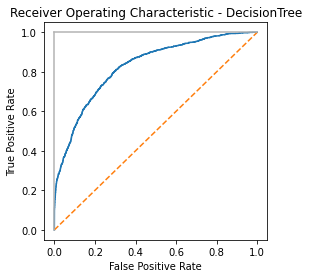

In [32]:
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Above ROC curve is to the upper left corner of the graph, the higher the accuracy of the Mk 

In [33]:
model.predict([[50,6,13,2,9,1,2,1,0,0,40,38]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])